<a href="https://colab.research.google.com/github/suhaibsafwanpython/SO-Data-2020/blob/main/Proj_of_n(Prog_Lang).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
print(pd.__version__)

1.1.4


In [2]:
data_frame = pd.read_csv('/content/drive/MyDrive/Main Data_Sets For Python/Stack OverFlow Data 2018/survey_results_public.csv')
data_frame.dropna(subset=['Age', 'ConvertedComp', 'LanguageWorkedWith'], axis=0, how='any', inplace=True)

In [3]:
data_frame.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,USD,MongoDB,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;Opportunities for professi...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",JavaScript,Python;SQL,Unity 3D,Ansible,NaN,Confluence;Jira;Github;Slack;Microsoft Teams;G...,Yes,Extremely important,Not at all important/not necessary,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once a year,Not sure,Yes,No,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,Linux-based,20 to 99 employees,iOS;Slack Apps and Integrations,Docker,I have some influence,Straight / Heterosexual,Yes,"No, not really",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,"I’m not actively looking, but I am open to new...",HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Pandas;TensorFlow,Pandas,Github;Microsoft Teams,Github;Microsoft Teams,No,Neutral,Fairly important,Curious about other opportunities;Better compe...,Company reviews from third party sites (e.g. G...,Every few months,Yes,Onboarding? What onboarding?,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,2 to 9 employees,Android;Linux;Raspberry Pi;Windows,Android;Linux;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,GBP,Firebase;MongoDB;PostgreSQL,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Slightly dissatisfied,I am actively looking for a job,Go;JavaScript;Swift;TypeScript,C#;JavaScript;Swift,Node.js;React Native,Node.js,"Jira;Github;Slack;Google Suite (Docs, Meet, etc)",Confluence;Jira;Github;Slack;Microsoft Teams;M...,No,Extremely important,Very important,Curious ab

In [4]:
spl_lang = data_frame['LanguageWorkedWith'].str.split(";")

In [5]:
# spl_lang.str.get(25).isnull().all() Upto 24 we got False

In [6]:
a = spl_lang.str.get(0)
b = spl_lang.str.get(1)
print(a); print(b)

7                       Python
9                     HTML/CSS
10                          C#
11                    HTML/CSS
12                           C
                 ...          
62212                       C#
63083                 HTML/CSS
63402    Bash/Shell/PowerShell
63517                 Assembly
63955                 HTML/CSS
Name: LanguageWorkedWith, Length: 30438, dtype: object
7               SQL
9              Java
10       JavaScript
11       JavaScript
12       JavaScript
            ...    
62212      HTML/CSS
63083          Java
63402            C#
63517             C
63955    JavaScript
Name: LanguageWorkedWith, Length: 30438, dtype: object


In [7]:
a.value_counts().sort_index(ascending=True)

Assembly                  1247
Bash/Shell/PowerShell    10556
C                         1902
C#                        5344
C++                        835
Dart                       342
Go                         763
HTML/CSS                  5554
Haskell                     56
Java                      1644
JavaScript                 866
Julia                       29
Kotlin                      69
Objective-C                112
PHP                         94
Perl                         9
Python                     628
R                           89
Ruby                        43
Rust                        17
SQL                         99
Scala                       34
Swift                       80
TypeScript                  14
VBA                         12
Name: LanguageWorkedWith, dtype: int64

In [8]:
b.value_counts().sort_index(ascending=True)

Bash/Shell/PowerShell     904
C                        2174
C#                       3575
C++                      1882
Dart                      341
Go                       1086
HTML/CSS                 6941
Haskell                   121
Java                     3055
JavaScript               5097
Julia                      35
Kotlin                    389
Objective-C               112
PHP                       327
Perl                       78
Python                   1306
R                         212
Ruby                      149
Rust                       80
SQL                       766
Scala                      97
Swift                     130
TypeScript                160
VBA                        63
Name: LanguageWorkedWith, dtype: int64

In [9]:
new = pd.concat([a.value_counts().sort_index(ascending=True), b.value_counts().sort_index(ascending=True)], ignore_index=False, axis=1)

In [10]:
new.columns = ['Lang1', 'Lang2']

In [11]:
new.fillna(0, inplace=True)
# new['Total'] = new['Lang1'] + new['Lang2']
# new.drop(columns=['Lang1', 'Lang2'], inplace=True)
new

,Lang1,Lang2
Assembly,1247,0.0
Bash/Shell/PowerShell,10556,904.0
C,1902,2174.0
C#,5344,3575.0
C++,835,1882.0
Dart,342,341.0
Go,763,1086.0
HTML/CSS,5554,6941.0
Haskell,56,121.0
Java,1644,3055.0


In [12]:
b = spl_lang.str.get(2)
b = b.value_counts().sort_index(ascending=True)

In [13]:
new = pd.concat([new, b], ignore_index=False, axis=1)
new.fillna(0, inplace=True)
new.drop(columns=['LanguageWorkedWith', 'LanguageWorkedWith'], inplace=True)
new

,Lang1,Lang2
Assembly,1247,0.0
Bash/Shell/PowerShell,10556,904.0
C,1902,2174.0
C#,5344,3575.0
C++,835,1882.0
Dart,342,341.0
Go,763,1086.0
HTML/CSS,5554,6941.0
Haskell,56,121.0
Java,1644,3055.0


In [14]:
new.columns = ['Lang1', 'Lang2']
new['Total'] = new['Lang1'] + new['Lang2']
new.drop(columns=['Lang1', 'Lang2'], inplace=True)
new

,Total
Assembly,1247.0
Bash/Shell/PowerShell,11460.0
C,4076.0
C#,8919.0
C++,2717.0
Dart,683.0
Go,1849.0
HTML/CSS,12495.0
Haskell,177.0
Java,4699.0


In [15]:
for i in range(3, 26):
  b = spl_lang.str.get(i)
  b = b.value_counts().sort_index(ascending=True)
  new = pd.concat([new, b], ignore_index=False, axis=1)
  new.fillna(0, inplace=True)
  new.columns = ['Lang1', 'Lang2']
  new['Total'] = new['Lang1'] + new['Lang2']
  new.drop(columns=['Lang1', 'Lang2'], inplace=True)

In [16]:
new.sort_values(by=['Total'], ascending=False, inplace=True)
new

,Total
SQL,15984.0
HTML/CSS,15290.0
JavaScript,14632.0
Bash/Shell/PowerShell,11460.0
Python,10623.0
C#,9251.0
Java,8317.0
TypeScript,8289.0
PHP,5596.0
C,4076.0


In [17]:
# su = new['Total'].sum()
# print(su)

In [18]:
# new['Percentage'] = new['Total'] / su * 100
# new

In [32]:
# Using Matplotlib to Plot
Y = [i for i in new.index]
print(len(Y))

25


In [31]:
X = [i for i in new['Total'].values]
print(len(X))

25


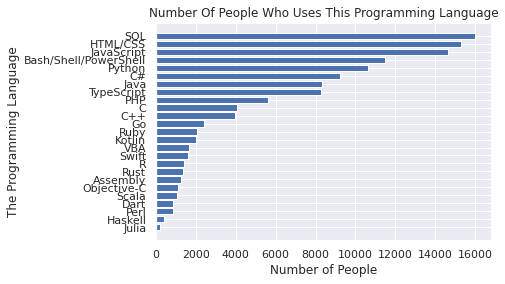

In [42]:
%matplotlib inline
sns.set()
# X.reverse()
# Y.reverse()
plt.barh(Y, X)

plt.title('Number Of People Who Uses This Programming Language')
plt.xlabel('Number of People')
plt.ylabel('The Programming Language')
plt.grid(True)
# plt.xscale('log')

plt.show()
